[View in Colaboratory](https://colab.research.google.com/github/sephiroth7712/DL/blob/master/mnist.ipynb)

In [1]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


[5 0 4 1 9 2 1 3 1 4]


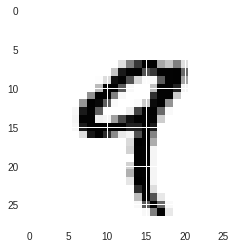

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtrain[4])
print(ytrain[0:10])